In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,auc, roc_curve


In [63]:
OUT_DIR = Path(r'C:\Users\HP\Desktop\PYTHON PROJECT FROM DATALABS\appendicitis_plots')
OUT_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(r'C:\Users\HP\Desktop\PYTHON PROJECT FROM DATALABS\Appendicitis Project Assets\appendicitis_data.csv')
df.head()


,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,Neutrophilia,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,Ketones_in_Urine,RBC_in_Urine,WBC_in_Urine,CRP,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,US_Number,Free_Fluids,Appendix_Wall_Layers,Target_Sign,Appendicolith,Perfusion,Perforation,Surrounding_Tissue_Reaction,Appendicular_Abscess,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,4.0,3.0,yes,7.1,no,yes,yes,no,no,yes,37.0,7.7,68.2,NaN,no,5.27,14.8,12.2,254.0,++,+,no,0.0,no,normal,no,yes,no,yes,882.0,no,intact,NaN,suspected,NaN,no,yes,no,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,4.0,no,NaN,yes,yes,yes,no,no,yes,36.9,8.1,64.8,NaN,no,5.26,15.7,12.7,151.0,no,no,no,3.0,yes,normal,no,yes,no,yes,883.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,3.0,no,NaN,no,yes,yes,no,no,no,36.6,13.2,74.8,NaN,no,3.98,11.4,12.2,300.0,no,no,no,3.0,no,constipation,no,yes,no,yes,884.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,7.0,6.0,no,NaN,yes,yes,no,no,yes,yes,36.0,11.4,63.0,NaN,no,4.64,13.6,13.2,258.0,no,no,no,0.0,yes,normal,no,yes,no,yes,886.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,5.0,6.0,yes,7.0,no,yes,yes,yes,yes,yes,36.9,8.1,44.0,NaN,no,4.44,12.6,13.6,311.0,no,no,no,0.0,no,constipation,no,yes,no,yes,887.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
print(df.shape)
df.info()


(782, 69)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12

In [65]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.loc[:, ~df.columns.str.contains('^unnamed')]
df = df.dropna(subset=['diagnosis'])
df.head()

,age,bmi,sex,height,weight,length_of_stay,management,severity,diagnosis_presumptive,diagnosis,alvarado_score,paedriatic_appendicitis_score,appendix_on_us,appendix_diameter,migratory_pain,lower_right_abd_pain,contralateral_rebound_tenderness,coughing_pain,nausea,loss_of_appetite,body_temperature,wbc_count,neutrophil_percentage,segmented_neutrophils,neutrophilia,rbc_count,hemoglobin,rdw,thrombocyte_count,ketones_in_urine,rbc_in_urine,wbc_in_urine,crp,dysuria,stool,peritonitis,psoas_sign,ipsilateral_rebound_tenderness,us_performed,us_number,free_fluids,appendix_wall_layers,target_sign,appendicolith,perfusion,perforation,surrounding_tissue_reaction,appendicular_abscess,abscess_location,pathological_lymph_nodes,lymph_nodes_location,bowel_wall_thickening,conglomerate_of_bowel_loops,ileus,coprostasis,meteorism,enteritis,gynecological_findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,4.0,3.0,yes,7.1,no,yes,yes,no,no,yes,37.0,7.7,68.2,NaN,no,5.27,14.8,12.2,254.0,++,+,no,0.0,no,normal,no,yes,no,yes,882.0,no,intact,NaN,suspected,NaN,no,yes,no,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,4.0,no,NaN,yes,yes,yes,no,no,yes,36.9,8.1,64.8,NaN,no,5.26,15.7,12.7,151.0,no,no,no,3.0,yes,normal,no,yes,no,yes,883.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,3.0,no,NaN,no,yes,yes,no,no,no,36.6,13.2,74.8,NaN,no,3.98,11.4,12.2,300.0,no,no,no,3.0,no,constipation,no,yes,no,yes,884.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,7.0,6.0,no,NaN,yes,yes,no,no,yes,yes,36.0,11.4,63.0,NaN,no,4.64,13.6,13.2,258.0,no,no,no,0.0,yes,normal,no,yes,no,yes,886.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,5.0,6.0,yes,7.0,no,yes,yes,yes,yes,yes,36.9,8.1,44.0,NaN,no,4.44,12.6,13.6,311.0,no,no,no,0.0,no,constipation,no,yes,no,yes,887.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [66]:
df = df.rename(columns={"paedriatic_appendicitis_score": "pediatric_appendicitis_score"})


In [67]:
import pickle
SAVE_DIR = "C:/Users/HP/Desktop/PYTHON PROJECT FROM DATALABS"   
Path(SAVE_DIR).mkdir(parents=True, exist_ok=True)
df.to_csv(Path(SAVE_DIR) / "appendicitis_clean.csv", index=False)

In [68]:
df.describe(include='all')


,age,bmi,sex,height,weight,length_of_stay,management,severity,diagnosis_presumptive,diagnosis,alvarado_score,pediatric_appendicitis_score,appendix_on_us,appendix_diameter,migratory_pain,lower_right_abd_pain,contralateral_rebound_tenderness,coughing_pain,nausea,loss_of_appetite,body_temperature,wbc_count,neutrophil_percentage,segmented_neutrophils,neutrophilia,rbc_count,hemoglobin,rdw,thrombocyte_count,ketones_in_urine,rbc_in_urine,wbc_in_urine,crp,dysuria,stool,peritonitis,psoas_sign,ipsilateral_rebound_tenderness,us_performed,us_number,free_fluids,appendix_wall_layers,target_sign,appendicolith,perfusion,perforation,surrounding_tissue_reaction,appendicular_abscess,abscess_location,pathological_lymph_nodes,lymph_nodes_location,bowel_wall_thickening,conglomerate_of_bowel_loops,ileus,coprostasis,meteorism,enteritis,gynecological_findings
count,780.000000,754.000000,779,755.000000,778.000000,777.000000,780,780,779,780,730.000000,730.000000,777,498.000000,773,774,767,766,774,772,775.000000,776.000000,679.000000,54.000000,732,764.000000,764.000000,756.000000,764.000000,582,576,583,771.000000,753,765,773,745,619,777,759.000000,719,218,138,69,63,81,252,85,13,203,121,99,43,60,71,140,66,26
unique,NaN,NaN,2,NaN,NaN,NaN,4,2,16,2,NaN,NaN,2,NaN,2,2,2,2,2,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,4,4,4,NaN,2,4,3,2,2,2,NaN,2,4,2,3,4,4,2,3,7,2,26,2,2,2,2,2,2,14
top,NaN,NaN,male,NaN,NaN,NaN,conservative,uncomplicated,appendicitis,appendicitis,NaN,NaN,yes,NaN,no,yes,no,no,yes,yes,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,no,no,no,NaN,no,normal,no,no,no,yes,NaN,no,intact,yes,yes,hyperperfused,no,yes,no,Douglas,yes,mesenterial,yes,no,no,yes,yes,yes,keine
freq,NaN,NaN,403,NaN,NaN,NaN,483,661,682,463,NaN,NaN,504,NaN,562,733,469,548,453,392,NaN,NaN,NaN,NaN,371,NaN,NaN,NaN,NaN,332,442,501,NaN,709,549,540,511,581,763,NaN,409,132,87,33,31,34,208,65,6,154,37,55,22,37,46,129,51,9
mean,11.341831,18.905138,NaN,147.997616,43.158625,4.285714,NaN,NaN,NaN,NaN,5.921918,5.253425,NaN,7.762651,NaN,NaN,NaN,NaN,NaN,NaN,37.404516,12.670683,71.791163,64.929630,NaN,4.799490,13.380497,13.180291,285.252618,NaN,NaN,NaN,31.386900,NaN,NaN,NaN,NaN,NaN,NaN,425.342556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.529811,4.387940,NaN,19.737546,17.397830,2.575302,NaN,NaN,NaN,NaN,2.155972,1.958456,NaN,2.536671,NaN,NaN,NaN,NaN,NaN,NaN,0.903678,5.366525,14.463656,15.085025,NaN,0.499012,1.393271,4.538774,72.494373,NaN,NaN,NaN,57.433854,NaN,NaN,NaN,NaN,NaN,NaN,271.722277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,7.830000,NaN,53.000000,3.960000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,26.900000,2.600000,27.200000,32.000000,NaN,3.620000,8.200000,11.200000,91.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.197500,15.722500,NaN,137.000000,29.500000,3.000000,NaN,NaN,NaN,NaN,4.000000,4.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,36.800000,8.200000,61.400000,54.500000,NaN,4.537500,12.600000,12.300000,236.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,198.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11.440000,18.045000,NaN,149.500000,41.300000,3.000000,NaN,NaN,NaN,NaN,6.000000,5.000000,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,37.200000,12.000000,75.500000,64.500000,NaN,4.780000,13.300000,12.700000,276.000000,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,398.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,14.040000,21.185000,NaN,163.000000,54.000000,5.000000,NaN,NaN,NaN,NaN,8.000000,7.000000,NaN,9.100000,NaN,NaN,NaN,NaN,NaN,NaN,37.900000,16.200000,83.600000,77.500000,NaN,5.020000,14.000000,13.300000,330.000000,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,613.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


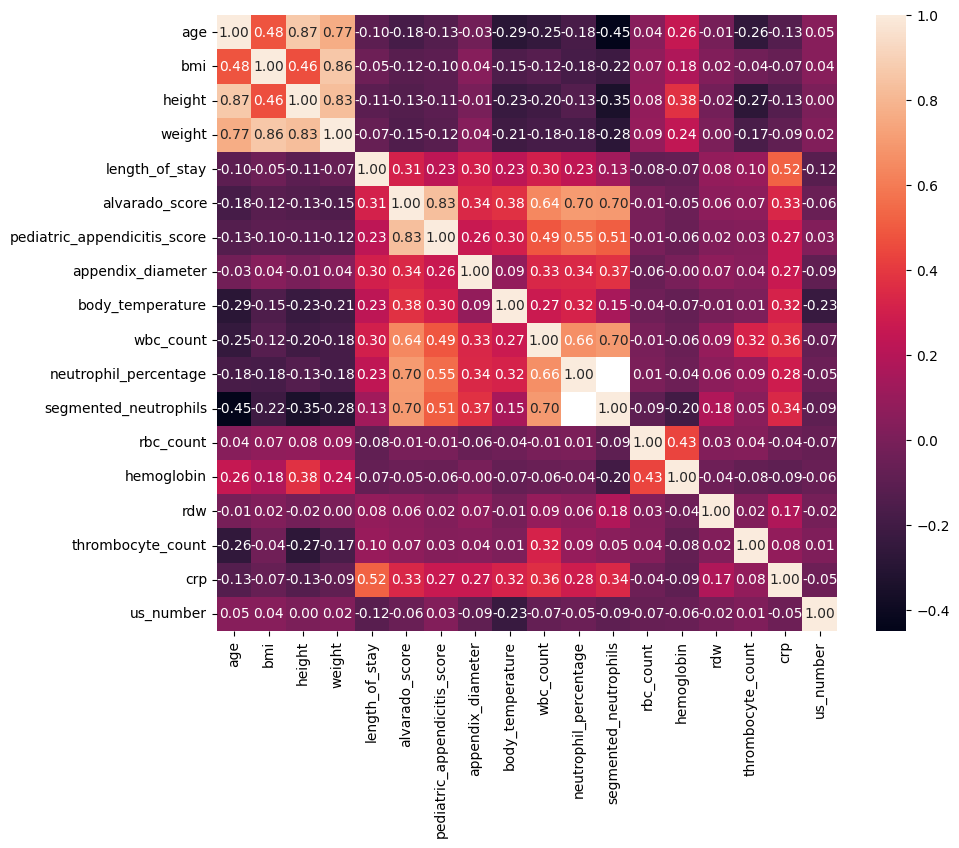

In [69]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()


In [70]:
# For Diagnosis Prediction
features = ['age', 'sex', 'psoas_sign', 'appendix_on_us', 'alvarado_score', 'pediatric_appendicitis_score']
X = df[features].copy()
y = df['diagnosis']

# Encode categorical if needed
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# list of feature columns that must be non-missing
required_features = ['age', 'sex', 'psoas_sign', 'appendix_on_us', 'alvarado_score', 'pediatric_appendicitis_score']

# required = required_features + ['diagnosis']
required = required_features

# show how many rows will be dropped
before = len(df)
df = df.dropna(subset=required)
after = len(df)
print(f'Dropped {before-after} rows with NaN in {required}')

# then continue to define X, y, and split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# required feature list
required_features = ['age', 'sex', 'psoas_sign', 'appendix_on_us', 'alvarado_score', 'pediatric_appendicitis_score']


# For TRAIN
mask_tr = X_train[required_features].notna().all(axis=1)
X_train = X_train.loc[mask_tr]
y_train = y_train[mask_tr.values]

# For TEST
mask_te = X_test[required_features].notna().all(axis=1)
X_test = X_test.loc[mask_te]
# y_test is a numpy array; use the boolean mask values to index it
y_test = y_test[mask_te.values]

print('Train shape after dropping:', X_train.shape)
print('Test shape after dropping:', X_test.shape)

Dropped 79 rows with NaN in ['age', 'sex', 'psoas_sign', 'appendix_on_us', 'alvarado_score', 'pediatric_appendicitis_score']
Train shape after dropping: (584, 6)
Test shape after dropping: (146, 6)


===== Logistic Regression =====
===== Random Forest =====
===== KNN =====
===== Gradient Boosting =====
===== KNN =====
===== Gradient Boosting =====
{'Logistic Regression': {'accuracy': 0.773972602739726, 'precision': 0.7166666666666667, 'recall': 0.7288135593220338, 'f1': 0.7226890756302521, 'report': '              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81        87\n           1       0.72      0.73      0.72        59\n\n    accuracy                           0.77       146\n   macro avg       0.77      0.77      0.77       146\nweighted avg       0.77      0.77      0.77       146\n'}, 'Random Forest': {'accuracy': 0.6986301369863014, 'precision': 0.6271186440677966, 'recall': 0.6271186440677966, 'f1': 0.6271186440677966, 'report': '              precision    recall  f1-score   support\n\n           0       0.75      0.75      0.75        87\n           1       0.63      0.63      0.63        59\n\n    accuracy                         

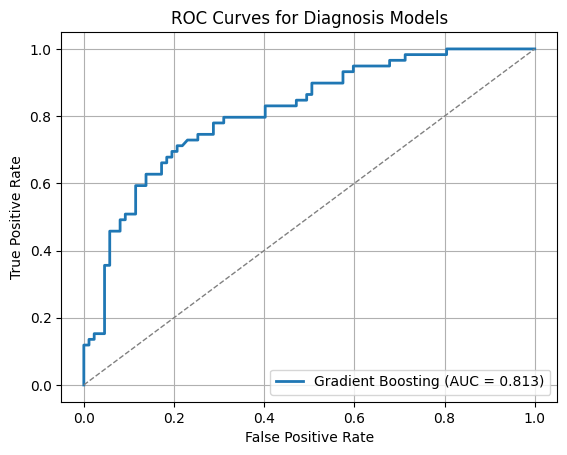

In [71]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    print(f"===== {name} =====")
    
    # Use scaled data for models that require scaling
    if name in ["Logistic Regression", "KNN Classifier"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, zero_division=0),
        "recall": recall_score(y_test, preds, zero_division=0),
        "f1": f1_score(y_test, preds, zero_division=0),
        "report": classification_report(y_test, preds)      
    }

print(results)
# Plot ROC Curves for all models
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot chance line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.title('ROC Curves for Diagnosis Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
f = OUT_DIR / 'roc_curve.png'
plt.savefig(f)
plt.show(f)



In [72]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.loc[:, ~df.columns.str.contains('^unnamed')]
df = df.dropna(subset=['severity'])
df.head()

,age,bmi,sex,height,weight,length_of_stay,management,severity,diagnosis_presumptive,diagnosis,alvarado_score,pediatric_appendicitis_score,appendix_on_us,appendix_diameter,migratory_pain,lower_right_abd_pain,contralateral_rebound_tenderness,coughing_pain,nausea,loss_of_appetite,body_temperature,wbc_count,neutrophil_percentage,segmented_neutrophils,neutrophilia,rbc_count,hemoglobin,rdw,thrombocyte_count,ketones_in_urine,rbc_in_urine,wbc_in_urine,crp,dysuria,stool,peritonitis,psoas_sign,ipsilateral_rebound_tenderness,us_performed,us_number,free_fluids,appendix_wall_layers,target_sign,appendicolith,perfusion,perforation,surrounding_tissue_reaction,appendicular_abscess,abscess_location,pathological_lymph_nodes,lymph_nodes_location,bowel_wall_thickening,conglomerate_of_bowel_loops,ileus,coprostasis,meteorism,enteritis,gynecological_findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,4.0,3.0,yes,7.1,no,yes,yes,no,no,yes,37.0,7.7,68.2,NaN,no,5.27,14.8,12.2,254.0,++,+,no,0.0,no,normal,no,yes,no,yes,882.0,no,intact,NaN,suspected,NaN,no,yes,no,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,4.0,no,NaN,yes,yes,yes,no,no,yes,36.9,8.1,64.8,NaN,no,5.26,15.7,12.7,151.0,no,no,no,3.0,yes,normal,no,yes,no,yes,883.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,3.0,no,NaN,no,yes,yes,no,no,no,36.6,13.2,74.8,NaN,no,3.98,11.4,12.2,300.0,no,no,no,3.0,no,constipation,no,yes,no,yes,884.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,7.0,6.0,no,NaN,yes,yes,no,no,yes,yes,36.0,11.4,63.0,NaN,no,4.64,13.6,13.2,258.0,no,no,no,0.0,yes,normal,no,yes,no,yes,886.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,5.0,6.0,yes,7.0,no,yes,yes,yes,yes,yes,36.9,8.1,44.0,NaN,no,4.44,12.6,13.6,311.0,no,no,no,0.0,no,constipation,no,yes,no,yes,887.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [73]:
df.describe(include='all')

,age,bmi,sex,height,weight,length_of_stay,management,severity,diagnosis_presumptive,diagnosis,alvarado_score,pediatric_appendicitis_score,appendix_on_us,appendix_diameter,migratory_pain,lower_right_abd_pain,contralateral_rebound_tenderness,coughing_pain,nausea,loss_of_appetite,body_temperature,wbc_count,neutrophil_percentage,segmented_neutrophils,neutrophilia,rbc_count,hemoglobin,rdw,thrombocyte_count,ketones_in_urine,rbc_in_urine,wbc_in_urine,crp,dysuria,stool,peritonitis,psoas_sign,ipsilateral_rebound_tenderness,us_performed,us_number,free_fluids,appendix_wall_layers,target_sign,appendicolith,perfusion,perforation,surrounding_tissue_reaction,appendicular_abscess,abscess_location,pathological_lymph_nodes,lymph_nodes_location,bowel_wall_thickening,conglomerate_of_bowel_loops,ileus,coprostasis,meteorism,enteritis,gynecological_findings
count,701.000000,679.000000,701,679.000000,700.000000,700.000000,701,701,701,701,701.000000,701.000000,701,460.000000,701,701,699,699,701,701,700.000000,701.000000,647.000000,52.000000,698,696.000000,696.000000,690.000000,696.000000,534,529,535,698.000000,687,696,701,701,577,700,685.000000,651,197,123,59,54,61,220,69,10,180,115,81,31,47,58,123,56,15
unique,NaN,NaN,2,NaN,NaN,NaN,3,2,9,2,NaN,NaN,2,NaN,2,2,2,2,2,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,4,4,4,NaN,2,4,3,2,2,2,NaN,2,3,2,3,4,4,2,3,6,2,26,2,2,2,2,2,2,9
top,NaN,NaN,male,NaN,NaN,NaN,conservative,uncomplicated,appendicitis,appendicitis,NaN,NaN,yes,NaN,no,yes,no,no,yes,yes,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,no,no,no,NaN,no,normal,no,no,no,yes,NaN,no,intact,yes,yes,hyperperfused,no,yes,no,Douglas,yes,mesenterial,yes,yes,no,yes,yes,yes,Ovarialzyste
freq,NaN,NaN,369,NaN,NaN,NaN,460,609,620,408,NaN,NaN,464,NaN,509,666,424,501,399,351,NaN,NaN,NaN,NaN,361,NaN,NaN,NaN,NaN,310,406,462,NaN,649,508,501,482,542,691,NaN,380,123,78,28,28,24,182,54,4,140,35,43,17,29,41,117,47,4
mean,11.400585,18.913068,NaN,148.375994,43.339229,4.115714,NaN,NaN,NaN,NaN,5.875892,5.222539,NaN,7.678043,NaN,NaN,NaN,NaN,NaN,NaN,37.375714,12.607932,71.495518,64.426923,NaN,4.809339,13.409483,13.195072,284.744253,NaN,NaN,NaN,29.136103,NaN,NaN,NaN,NaN,NaN,NaN,425.430657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.458226,4.406809,NaN,19.550063,17.340718,2.366198,NaN,NaN,NaN,NaN,2.163398,1.959331,NaN,2.484562,NaN,NaN,NaN,NaN,NaN,NaN,0.902712,5.321475,14.491091,15.129352,NaN,0.504203,1.401858,4.743010,70.504477,NaN,NaN,NaN,53.957314,NaN,NaN,NaN,NaN,NaN,NaN,276.761530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.040000,7.830000,NaN,53.000000,3.960000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,26.900000,2.600000,27.200000,32.000000,NaN,3.620000,8.200000,11.200000,91.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.250000,15.750000,NaN,137.500000,30.000000,3.000000,NaN,NaN,NaN,NaN,4.000000,4.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,36.800000,8.300000,60.750000,54.000000,NaN,4.540000,12.700000,12.300000,236.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,191.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11.440000,18.000000,NaN,150.000000,41.450000,3.000000,NaN,NaN,NaN,NaN,6.000000,5.000000,NaN,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,37.200000,11.900000,75.000000,63.500000,NaN,4.780000,13.400000,12.700000,276.000000,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,393.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,14.020000,21.080000,NaN,163.000000,54.050000,5.000000,NaN,NaN,NaN,NaN,8.000000,6.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,37.900000,16.100000,83.400000,76.500000,NaN,5.020000,14.000000,13.300000,330.000000,NaN,NaN,NaN,30.750000,NaN,NaN,NaN,NaN,NaN,NaN,622.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
sex_encoder = LabelEncoder()
df['sex_encoded'] = sex_encoder.fit_transform(df['sex'])
joblib.dump(sex_encoder, 'sex_encoder.pkl')
    
# Severity (Target) Encoder
severity_encoder = LabelEncoder()
df['severity_encoded'] = severity_encoder.fit_transform(df['severity'])
joblib.dump(severity_encoder, 'severity_encoder.pkl')

features = ['age', 'sex_encoded', 'wbc_count', 'crp', 'appendix_on_us', 'neutrophil_percentage', 'alvarado_score', 'pediatric_appendicitis_score']
X = df[features].copy()
y = df['severity_encoded']

# Encode categorical if needed
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# list of feature columns that must be non-missing
required_features = ['age', 'sex_encoded', 'wbc_count', 'crp', 'appendix_on_us', 'neutrophil_percentage', 'alvarado_score', 'pediatric_appendicitis_score']

# If you also need the target to be present, include it too:
# required = required_features + ['severity']
required = required_features

# show how many rows will be dropped
before = len(df)
df = df.dropna(subset=required)
after = len(df)
print(f'Dropped {before-after} rows with NaN in {required}')



# then continue to define X, y, and split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# required feature list
required_features = ['age', 'sex_encoded', 'wbc_count', 'crp', 'appendix_on_us', 'neutrophil_percentage', 'alvarado_score', 'pediatric_appendicitis_score']

# For TRAIN
mask_tr = X_train[required_features].notna().all(axis=1)
X_train = X_train.loc[mask_tr]
# y_train is a numpy array (LabelEncoder produced an array). Index it with the boolean mask values
y_train = y_train[mask_tr.values]

# For TEST
mask_te = X_test[required_features].notna().all(axis=1)
X_test = X_test.loc[mask_te]
# y_test is a numpy array; use the boolean mask values to index it
y_test = y_test[mask_te.values]

print('Train shape after dropping:', X_train.shape)
print('Test shape after dropping:', X_test.shape)

Dropped 0 rows with NaN in ['age', 'sex_encoded', 'wbc_count', 'crp', 'appendix_on_us', 'neutrophil_percentage', 'alvarado_score', 'pediatric_appendicitis_score']
Train shape after dropping: (515, 8)
Test shape after dropping: (129, 8)


===== Logistic Regression =====
===== Random Forest =====
===== KNN =====
===== Gradient Boosting =====
===== KNN =====
===== Gradient Boosting =====
{'Logistic Regression': {'accuracy': 0.937984496124031, 'precision': 0.9672131147540983, 'recall': 0.9672131147540983, 'f1': 0.9672131147540983, 'report': '              precision    recall  f1-score   support\n\n           0       0.43      0.43      0.43         7\n           1       0.97      0.97      0.97       122\n\n    accuracy                           0.94       129\n   macro avg       0.70      0.70      0.70       129\nweighted avg       0.94      0.94      0.94       129\n'}, 'Random Forest': {'accuracy': 0.937984496124031, 'precision': 0.975, 'recall': 0.9590163934426229, 'f1': 0.9669421487603306, 'report': '              precision    recall  f1-score   support\n\n           0       0.44      0.57      0.50         7\n           1       0.97      0.96      0.97       122\n\n    accuracy                           0.94       1

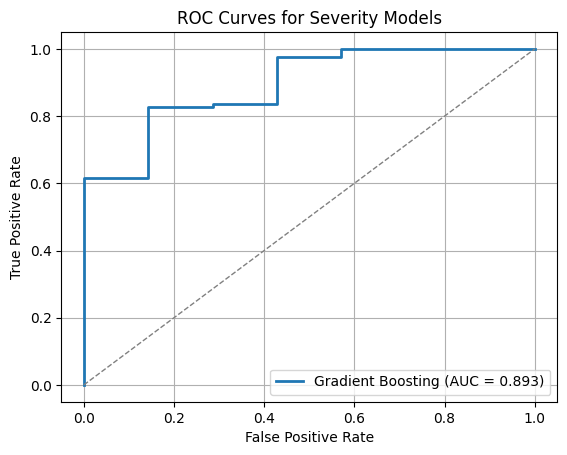

In [83]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
results = {}

for name, model in models.items():
    print(f"===== {name} =====")
    
    # Use scaled data for models that require scaling
    if name in ["Logistic Regression", "KNN Classifier"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]


    results[name] = {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, zero_division=0),
        "recall": recall_score(y_test, preds, zero_division=0),
        "f1": f1_score(y_test, preds, zero_division=0),
        "report": classification_report(y_test, preds)      
    }

joblib.dump(models["Gradient Boosting"],'gb_model.pkl')
print(results)

# Plot ROC Curves for all models
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot chance line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.title('ROC Curves for Severity Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
f = OUT_DIR / 'roc_curve_severity.png'
plt.savefig(f)
plt.show(f)



In [ ]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import numpy as np
from pathlib import Path


MODEL_PATH = Path('gb_model.pkl')
SEX_ENCODER_PATH = Path('sex_encoder.pkl')
SEVERITY_ENCODER_PATH = Path('severity_encoder.pkl')


# --- Helper Functions ---
@st.cache_resource
def load_assets():
    """Loads the trained model and encoders, caching them for efficiency."""
    try:
        model = joblib.load(MODEL_PATH)
        sex_encoder = joblib.load(SEX_ENCODER_PATH)
        severity_encoder = joblib.load(SEVERITY_ENCODER_PATH)
        return model, sex_encoder, severity_encoder
    except FileNotFoundError as e:
        st.error(f"Error loading required files: {e.filename} not found.")
        st.info("Please run `model_trainer.py` first to generate the model files.")
        st.stop()
    except Exception as e:
        st.error(f"An unexpected error occurred during asset loading: {e}")
        st.stop()

# --- Main Application Logic ---

def main():
    st.set_page_config(
        page_title="Appendicitis Severity Predictor",
        layout="wide",
        initial_sidebar_state="expanded"
    )
    st.title("🏥 Appendicitis Severity Prediction")
    st.markdown("Use this tool to predict the severity of appendicitis (Complicated vs. Uncomplicated) based on key clinical metrics.")

    model, sex_encoder, severity_encoder = load_assets()

    # --- Sidebar for User Input ---
    with st.sidebar:
        st.header("Patient Clinical Data")
        
        # Age input
        age = st.slider("Age (Years)", min_value=1, max_value=120, value=30, step=1)
        
        # Gender input
        sex_options = ['Male', 'Female']
        sex = st.selectbox("Sex", options=sex_options)
        
        # WBC input (White Blood Cell Count)
        wbc_count = st.number_input("WBC Count (x10⁹/L)", min_value=1.0, max_value=40.0, value=12.0, step=0.1)
        st.caption("Normal range: 4.5–11.0. Higher values suggest inflammation.")

        # CRP input (C-Reactive Protein)
        crp = st.number_input("CRP Level (mg/L)", min_value=0.1, max_value=100.0, value=15.0, step=0.1)
        st.caption("Inflammatory marker. Higher values (e.g., >20 mg/L) may indicate perforation/complication.")

        # appendix_on_us (Appendix on Ultrasound)
        appendix_on_us_options = ['Yes','No']
        appendix_on_us = st.selectbox("Appendix on Ultrasound", options=appendix_on_us_options)

        # Neutrophil Percentage input
        neutrophil_percentage = st.number_input("Neutrophil Percentage (%)", min_value=10.0, max_value=99.0, value=75.0, step=0.1)
        st.caption("Percentage of WBCs that are neutrophils. High values (e.g., >75%) are often seen in appendicitis.")

        # alvarado_score (Alvarado Score)
        alvarado_score = st.number_input("Alvarado Score", min_value=1.0, max_value=10.0, value=2.0, step=1.0)
        st.caption("Alvarado Score of >=7, suggests a higher probability of appendicits")
        
        # pediatric_appendicitis_score (Pediatric Appendicitis Score)
        pediatric_appendicitis_score = st.number_input("Pediatric Appendicitis Score", min_value=1.0, max_value=10.0, value=2.0, step=1.0)
        st.caption("Pediatric Appendicitis Score >=6, suggests a higher probability of appendicitis")

        predict_button = st.button("Predict Severity", type="primary")

    # --- Prediction & Results Display ---
    st.subheader("Prediction Results")
    
    if predict_button:
        # 1. Prepare Data for Prediction
        # Encode Gender input
        gender_encoded = gender_encoder.transform([gender])[0]
        
        # Create a DataFrame from inputs
        input_data = pd.DataFrame({
            'Age': [age],
            'WBC': [wbc],
            'Neutrophil_Percentage': [neutrophil_pct],
            'CRP': [crp],
            'Gender_Encoded': [gender_encoded]
        })
        
        # 2. Make Prediction
        # Predict the encoded class (0 or 1)
        prediction_encoded = model.predict(input_data)[0]
        
        # Get prediction probability for both classes
        prediction_proba = model.predict_proba(input_data)[0]
        
        # 3. Decode Result
        predicted_severity = severity_encoder.inverse_transform([prediction_encoded])[0]

        # 4. Display Results
        st.markdown(f"**Predicted Severity:**")
        
        if predicted_severity == 'Complicated':
            st.success(f"## {predicted_severity} Appendicitis")
            st.warning("Prediction suggests a Complicated case (e.g., perforation). Immediate surgical consultation is critical.")
        else:
            st.info(f"## {predicted_severity} Appendicitis")
            st.success("Prediction suggests an Uncomplicated case. Continue with standard clinical protocol.")

        st.divider()

        # Display probability breakdown for transparency
        st.markdown("### Model Confidence (Probabilities)")
        
        # Map probabilities back to original labels
        proba_df = pd.DataFrame({
            'Severity': severity_encoder.classes_,
            'Probability': prediction_proba
        }).sort_values(by='Probability', ascending=False)
        
        # Format percentages
        proba_df['Probability'] = proba_df['Probability'].apply(lambda x: f"{x * 100:.1f}%")

        st.dataframe(proba_df, use_container_width=True, hide_index=True)


if __name__ == "__main__":
    main()